# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

HI_path = "/content/drive/MyDrive/Dataset/Datathon Project/HI-Small_Trans.csv.zip"
LI_path = "/content/drive/MyDrive/Dataset/Datathon Project/LI-Small_Trans.csv.zip"

!unzip -q "{HI_path}" -d "./data"
!unzip -q "{LI_path}" -d "./data"

replace ./data/HI-Small_Trans.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/LI-Small_Trans.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
HI = pd.read_csv("/content/data/HI-Small_Trans.csv")
LI = pd.read_csv("/content/data/LI-Small_Trans.csv")

# HI Dataset

## EDA

In [ ]:
HI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  int64  
 7   Amount Paid         float64
 8   Payment Currency    int64  
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 426.2+ MB


In [ ]:
HI.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,12,3697.34,12,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,12,0.01,12,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,12,14675.57,12,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,12,2806.97,12,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,12,36682.97,12,Reinvestment,0


In [ ]:
# Check for missing values and summarize them if they exist
HI.isnull().sum()

,0
Timestamp,0
From Bank,0
Account,0
To Bank,0
Account.1,0
Amount Received,0
Receiving Currency,0
Amount Paid,0
Payment Currency,0
Payment Format,0


In [ ]:
# Check whether there are any duplicated values or not
print(f"Total number of duplicate records: ", HI.duplicated().sum())

# Identify which rows have duplicate
HI[HI.duplicated(keep="first")]

Total number of duplicate records:  9


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
863295,2022/09/01 16:20,12004,800C927C1,12004,800C927C0,0.000008,1,0.080000,4,ACH,0
863296,2022/09/01 16:20,12004,800C927C1,220,813D8C1E1,0.000008,1,0.000008,1,Bitcoin,0
3684005,2022/09/07 21:25,29992,8099A29B1,220,813725AE1,0.000003,1,0.000003,1,Bitcoin,0
4166786,2022/09/08 21:05,113779,811144AB1,113779,811144AB0,0.000002,1,0.020000,12,ACH,0
4166787,2022/09/08 21:05,113779,811144AB1,53744,813C777F1,0.000002,1,0.000002,1,Bitcoin,0
4510480,2022/09/09 10:03,6075,80C702911,6075,80C702910,0.000002,1,0.020000,12,ACH,0
4510481,2022/09/09 10:03,6075,80C702911,154653,814389B61,0.000002,1,0.000002,1,Bitcoin,0
4816512,2022/09/09 21:33,14433,80935A891,14433,80935A890,0.000001,1,0.010000,12,ACH,0
4816513,2022/09/09 21:33,14433,80935A891,15,813F7AE61,0.000001,1,0.000001,1,Bitcoin,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Turning Timestamp Row into datetime type
HI['Timestamp'] = pd.to_datetime(HI["Timestamp"])

# Buat fitur waktu tambahan
HI['Hour'] = HI['Timestamp'].dt.hour
HI['DayOfWeek'] = HI['Timestamp'].dt.dayofweek

/tmp/ipython-input-10-2682549928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is Laundering', data=HI, palette='Set2')


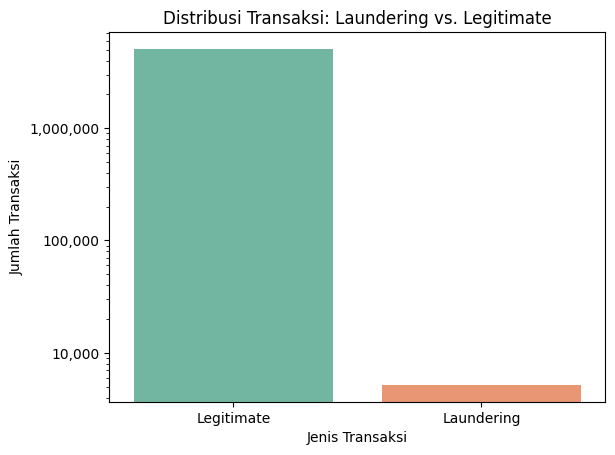

In [ ]:
from matplotlib.ticker import FuncFormatter

# Imbalance check for "Is Laundering" row
sns.countplot(x='Is Laundering', data=HI, palette='Set2')
plt.title('Distribusi Transaksi: Laundering vs. Legitimate')
plt.xticks([0, 1], ['Legitimate', 'Laundering'])
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [ ]:
# Display the count of imbalanced data
pd.Series(HI['Is Laundering']).value_counts()

,count
Is Laundering,
0,5073168
1,5177


In [ ]:
HI.describe()

,Timestamp,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Is Laundering,Hour,DayOfWeek
count,5078345,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,2022-09-05 07:16:08.194274816,4.573057e+04,6.574456e+04,5.988726e+06,8.382732e+00,4.509273e+06,8.413146e+00,1.019427e-03,1.049247e+01,2.993644e+00
min,2022-09-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e-06,0.000000e+00,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022-09-02 04:32:00,1.190000e+02,4.259000e+03,1.833700e+02,4.000000e+00,1.844800e+02,4.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00
50%,2022-09-05 12:16:00,9.679000e+03,2.156800e+04,1.411010e+03,1.000000e+01,1.414540e+03,1.000000e+01,0.000000e+00,1.000000e+01,3.000000e+00
75%,2022-09-08 03:13:00,2.862800e+04,1.223320e+05,1.234627e+04,1.200000e+01,1.229784e+04,1.200000e+01,0.000000e+00,1.700000e+01,4.000000e+00
max,2022-09-18 16:18:00,3.563030e+05,3.562940e+05,1.046302e+12,1.400000e+01,1.046302e+12,1.400000e+01,1.000000e+00,2.300000e+01,6.000000e+00
std,NaN,8.176562e+04,8.409299e+04,1.037183e+09,4.121243e+00,8.697728e+08,4.120945e+00,3.191219e-02,7.362643e+00,1.517896e+00


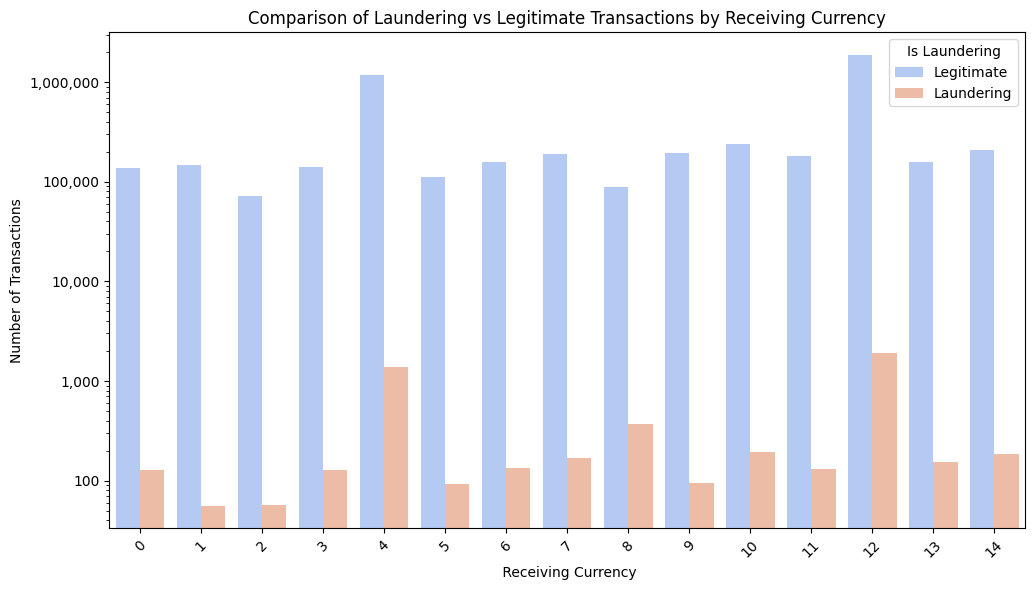

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Receiving Currency', hue='Is Laundering', data=HI, palette='coolwarm')
plt.yscale('log')
plt.title('Comparison of Laundering vs Legitimate Transactions by Receiving Currency')
plt.xlabel(' Receiving Currency')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Laundering', labels=['Legitimate', 'Laundering'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

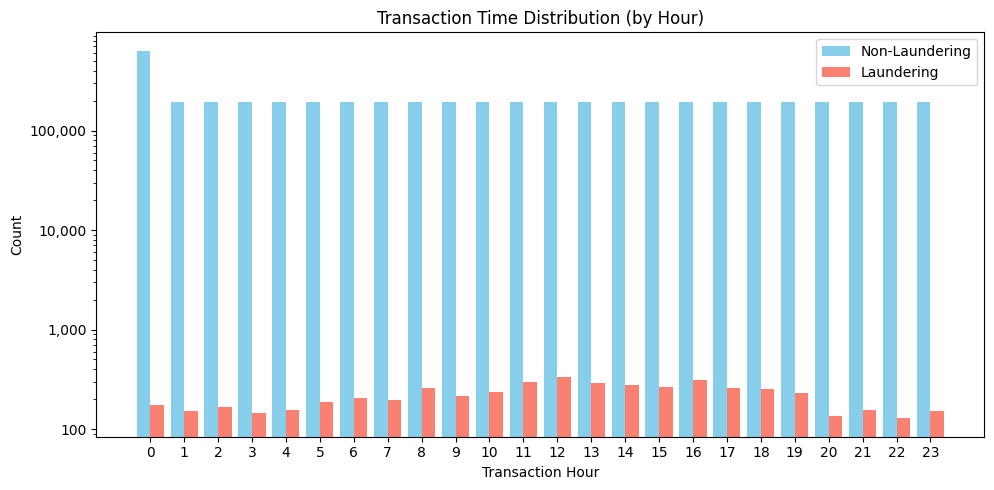

In [ ]:
# Count the number of transactions per hour for each 'Is Laundering' category
counts = HI.groupby(['Hour', 'Is Laundering']).size().unstack(fill_value=0)

# Prepare x positions and bar width
hours = counts.index
bar_width = 0.4
x = range(len(hours))

plt.figure(figsize=(10, 5))

# Plot side-by-side bars
plt.bar([i - bar_width/2 for i in x], counts[0], width=bar_width, label='Non-Laundering', color='skyblue')
plt.bar([i + bar_width/2 for i in x], counts[1], width=bar_width, label='Laundering', color='salmon')


plt.title('Transaction Time Distribution (by Hour)')
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=hours)
plt.legend()
plt.tight_layout()
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

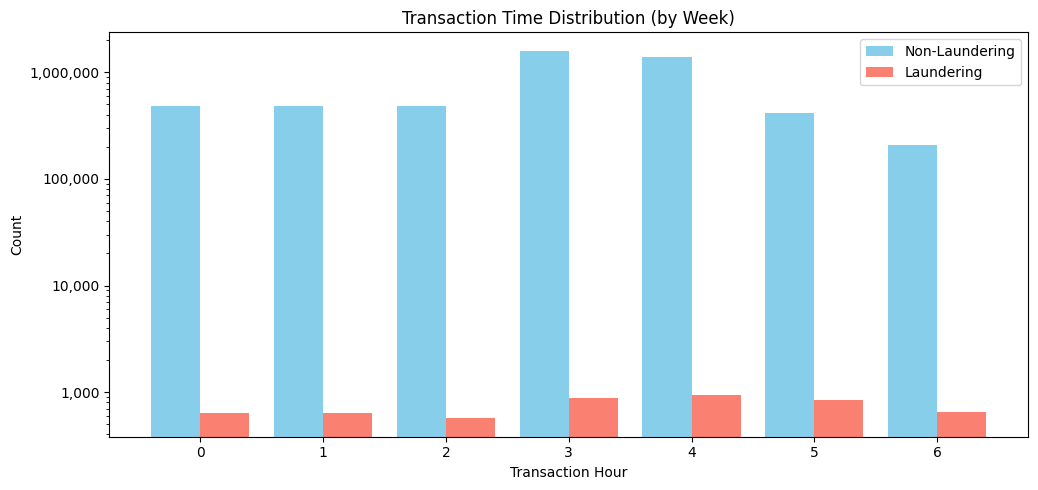

In [ ]:
# Count the number of transactions per hour for each 'Is Laundering' category
counts = HI.groupby(['DayOfWeek', 'Is Laundering']).size().unstack(fill_value=0)

# Prepare x positions and bar width
day = counts.index
bar_width = 0.4
x = range(len(day))

plt.figure(figsize=(10, 5))

# Plot side-by-side bars
plt.bar([i - bar_width/2 for i in x], counts[0], width=bar_width, label='Non-Laundering', color='skyblue')
plt.bar([i + bar_width/2 for i in x], counts[1], width=bar_width, label='Laundering', color='salmon')


plt.title('Transaction Time Distribution (by Week)')
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=day)
plt.legend()
plt.tight_layout()
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

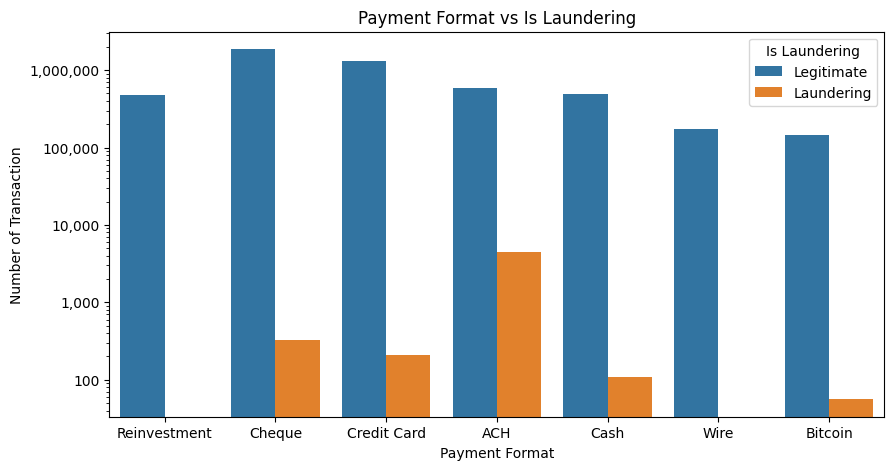

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=HI, x='Payment Format', hue='Is Laundering')
plt.title('Payment Format vs Is Laundering')
plt.xlabel('Payment Format')
plt.ylabel('Number of Transaction')
plt.legend(title='Is Laundering', labels=['Legitimate', 'Laundering'])
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

## Preprocessing

1.  Label encoding for Receiving Currency, Payment Currency, Payment Format
2.  min-max normalization for Timestamp
3.  Create Unique ID for each account as NODE for our graph
4.  Seperate Receiver and Sender Information and compile it

In [ ]:
# Ini dirubah
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in ['Receiving Currency', 'Payment Currency', 'Payment Format']:
    encoder = LabelEncoder()
    HI[col] = encoder.fit_transform(HI[col])
    label_encoders[col] = encoder

In [ ]:
# store list of currency for later use
currencies = sorted(HI['Receiving Currency'].unique())

In [ ]:
HI['Timestamp'] = pd.to_datetime(HI['Timestamp'])
HI['Timestamp'] = HI['Timestamp'].astype('int64') / 1e9
HI['Timestamp'] = (HI['Timestamp'] - HI['Timestamp'].min()) / (HI['Timestamp'].max() - HI['Timestamp'].min())

In [ ]:
# Di ubah
# Combine multiple row for create a new row (feature), so that the new row's was more imformative and decrease the number of row
HI['Sender_ID'] = HI['From Bank'].astype(str) + "_" + HI['Account']
HI['Receiver_ID'] = HI['To Bank'].astype(str) + "_" + HI['Account.1']

## Node Features for GNN

In [ ]:
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html


In [ ]:
import torch

# Ini diubah dikit
senders = HI[['Sender_ID', 'From Bank']].rename(columns={'Sender_ID': 'Account', 'From Bank': 'Bank'})
receivers = HI[['Receiver_ID', 'To Bank']].rename(columns={'Receiver_ID': 'Account', 'To Bank': 'Bank'})
nodes = pd.concat([senders, receivers]).drop_duplicates('Account').reset_index(drop=True)
nodes['Is Laundering'] = 0

# Tandai node laundering
laundering_accounts = pd.concat([
    HI.loc[HI['Is Laundering'] == 1, 'Sender_ID'],
    HI.loc[HI['Is Laundering'] == 1, 'Receiver_ID']
])
nodes.loc[nodes['Account'].isin(laundering_accounts), 'Is Laundering'] = 1

# Tambahkan node_id dan encode Bank
nodes['node_id'] = pd.factorize(nodes['Account'])[0]
nodes['Bank'] = LabelEncoder().fit_transform(nodes['Bank'])

# AGGREGATE FEATURES PER CURRENCY
paid = HI[['Sender_ID', 'Amount Paid', 'Payment Currency']].rename(columns={'Sender_ID': 'Account'})
recv = HI[['Receiver_ID', 'Amount Received', 'Receiving Currency']].rename(columns={'Receiver_ID': 'Account'})

paid_agg = paid.groupby(['Account', 'Payment Currency'])['Amount Paid'].mean().unstack(fill_value=0)
recv_agg = recv.groupby(['Account', 'Receiving Currency'])['Amount Received'].mean().unstack(fill_value=0)

# Gabungkan semua fitur node
features = pd.concat([paid_agg, recv_agg], axis=1)
features.columns = [f"paid_{c}" if i < paid_agg.shape[1] else f"recv_{c}" for i, c in enumerate(features.columns)]
features = features.reset_index()
nodes = nodes.merge(features, on='Account', how='left').fillna(0)

# Tambahkan waktu rata-rata transaksi
HI['Hour'] = pd.to_datetime(HI['Timestamp'] * (HI['Timestamp'].max() - HI['Timestamp'].min()) + HI['Timestamp'].min(), unit='s').dt.hour
HI['DayOfWeek'] = pd.to_datetime(HI['Timestamp'] * (HI['Timestamp'].max() - HI['Timestamp'].min()) + HI['Timestamp'].min(), unit='s').dt.dayofweek

time_feat = HI[['Sender_ID', 'Hour', 'DayOfWeek']].rename(columns={'Sender_ID': 'Account'})
time_feat = time_feat.groupby('Account').mean().reset_index()
nodes = nodes.merge(time_feat, on='Account', how='left').fillna(0)

# Final feature matrix
x = torch.tensor(nodes.drop(columns=['Account', 'Is Laundering', 'node_id']).values, dtype=torch.float)
y = torch.tensor(nodes['Is Laundering'].values, dtype=torch.long)

In [ ]:
nodes.head()

,Account,Bank,Is Laundering,node_id,paid_0,paid_1,paid_2,paid_3,paid_4,paid_5,...,recv_7,recv_8,recv_9,recv_10,recv_11,recv_12,recv_13,recv_14,Hour,DayOfWeek
0,10_8000EBD30,8,0,0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,330.166429,0.0,0.0,0.0,3.0
1,3208_8000F4580,109,0,1,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.0
2,3209_8000F4670,110,0,2,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14675.570000,0.0,0.0,0.0,3.0
3,12_8000F5030,10,1,3,0.0,0.0,616552.72,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,756.486190,0.0,0.0,0.0,3.0
4,10_8000F5200,8,0,4,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3120.573333,0.0,0.0,0.0,3.0


In [ ]:
HI.sample()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,DayOfWeek,Sender_ID,Receiver_ID
4632330,0.488019,4403,803388060,11813,8070D0CE0,10671087.57,12,10671087.57,12,3,0,0,3,4403_803388060,11813_8070D0CE0


## Edge

In [ ]:
# Create edge list (source and target)
account_to_id = dict(zip(nodes['Account'], nodes['node_id']))
HI['from_node'] = HI['Sender_ID'].map(account_to_id)
HI['to_node'] = HI['Receiver_ID'].map(account_to_id)

edges = HI.dropna(subset=['from_node', 'to_node']).copy()
edge_index = torch.tensor([
    edges['from_node'].astype(int).values,
    edges['to_node'].astype(int).values
], dtype=torch.long)

In [ ]:
from torch_geometric.data import Data

edge_attr = torch.tensor(edges[['Timestamp', 'Amount Paid', 'Payment Currency',
                                'Amount Received', 'Receiving Currency', 'Payment Format']].values, dtype=torch.float32)

data = Data(x=x, edge_index=edge_index, y=y, edge_attr=edge_attr)

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split index
idx = torch.arange(data.num_nodes)
train_idx, test_idx = train_test_split(idx, test_size=0.2, stratify=data.y.numpy(), random_state=42)

data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.train_mask[train_idx] = True
data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.test_mask[test_idx] = True

## Model


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import Linear

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

def accuracy(preds, labels):
    predicted = preds.argmax(dim=1)
    correct = (predicted == labels).float().sum()
    return correct / len(labels)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)
model = GCN(in_channels=data.num_node_features, hidden_channels=64, out_channels=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

print("Training model...")
for epoch in range(1, 201):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    acc = accuracy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | Train Acc: {acc.item():.4f}")

Training model...
Epoch  20 | Loss: 126669.4453 | Train Acc: 0.9853
Epoch  40 | Loss: 83431.9531 | Train Acc: 0.9802
Epoch  60 | Loss: 48259.4688 | Train Acc: 0.9848
Epoch  80 | Loss: 30593.1055 | Train Acc: 0.9551
Epoch 100 | Loss: 15704.4209 | Train Acc: 0.9704
Epoch 120 | Loss: 15824.5273 | Train Acc: 0.9669
Epoch 140 | Loss: 6566.2280 | Train Acc: 0.9803
Epoch 160 | Loss: 12561.3965 | Train Acc: 0.9523
Epoch 180 | Loss: 8781.4609 | Train Acc: 0.9581
Epoch 200 | Loss: 16772.4590 | Train Acc: 0.9455


## Model Evaluation

In [ ]:
# Overfitting check
model.eval()
out = model(data)

preds = out.argmax(dim=1)

train_acc = (preds[data.train_mask] == data.y[data.train_mask]).float().mean().item()
test_acc = (preds[data.test_mask] == data.y[data.test_mask]).float().mean().item()

print(f"Training: {train_acc:.4f}")
print(f"Testing : {test_acc:.4f}")

Training: 0.9845
Testing : 0.9848


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
with torch.no_grad():
    logits = model(data)

preds = logits.argmax(dim=1).cpu().numpy()
true_labels = data.y.cpu().numpy()

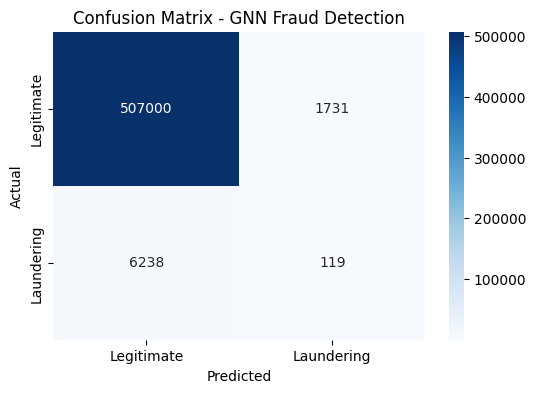

In [ ]:
cm = confusion_matrix(true_labels, preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Legitimate", "Laundering"],
            yticklabels=["Legitimate", "Laundering"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GNN Fraud Detection")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

preds = out.argmax(dim=1).cpu().numpy()
true_labels = data.y.cpu().numpy()

print(classification_report(true_labels, preds, target_names=["Legitimate", "Laundering"]))

              precision    recall  f1-score   support

  Legitimate       0.99      0.87      0.92    508731
  Laundering       0.00      0.01      0.00      6357

    accuracy                           0.86    515088
   macro avg       0.49      0.44      0.46    515088
weighted avg       0.97      0.86      0.91    515088



## Save Model

In [ ]:
torch.save(model.state_dict(), 'model_gnn_aml.pth')